Step 1: Import Required Libraries

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


Step 2: Load Dataset

In [39]:
# Load the dataset
df = pd.read_csv("archive/train.csv")  # Change filename if different
print(df.shape)
df.head()


(614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


 Step 3: Handle Missing Data

In [40]:
# Display missing values
print(df.isnull().sum())

# Fill missing values for numerical columns
num_imputer = SimpleImputer(strategy='median')
df[['LoanAmount']] = num_imputer.fit_transform(df[['LoanAmount']])

# Fill missing values for categorical columns
cat_imputer = SimpleImputer(strategy='most_frequent')
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']:
    df[[col]] = cat_imputer.fit_transform(df[[col]])

# Drop rows with target variable missing (if any)
df = df.dropna(subset=['Loan_Status'])


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


Step 4: Exploratory Data Analysis (EDA)

Histogram – Loan Amount Distribution

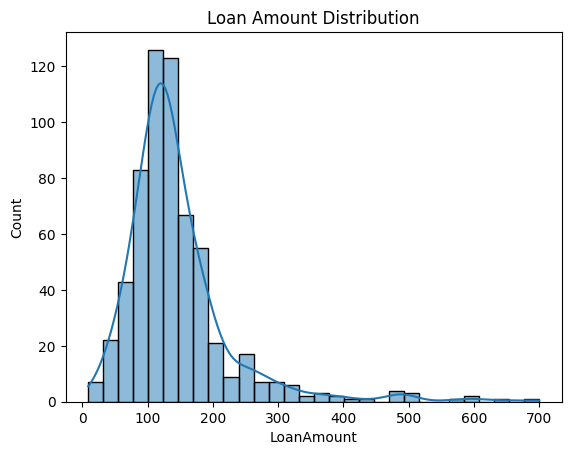

In [41]:
sns.histplot(df['LoanAmount'], kde=True, bins=30)
plt.title('Loan Amount Distribution')
plt.show()


Box Plot – ApplicantIncome by Education

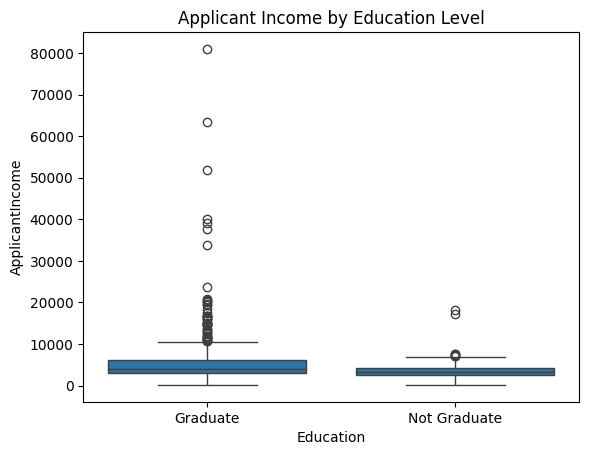

In [42]:
sns.boxplot(x='Education', y='ApplicantIncome', data=df)
plt.title('Applicant Income by Education Level')
plt.show()


Bar Plot – Education vs Loan Approval

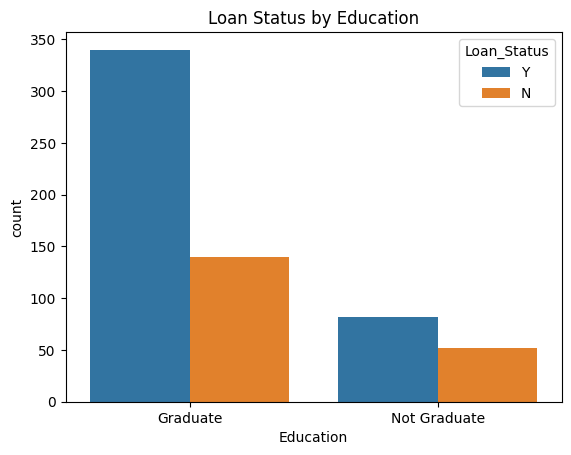

In [43]:
sns.countplot(x='Education', hue='Loan_Status', data=df)
plt.title('Loan Status by Education')
plt.show()


Step 5: Data Preprocessing for Modeling

In [44]:
# Encode categorical features
le = LabelEncoder()
for col in ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']:
    df[col] = le.fit_transform(df[col])

# Convert Dependents to numeric (replace '3+' with 3)
df['Dependents'] = df['Dependents'].replace('3+', 3).astype(int)

# Feature selection
features = ['Credit_History', 'Education', 'ApplicantIncome', 'LoanAmount']
X = df[features]
y = df['Loan_Status']


Step 6: Split Dataset

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=39)


Step 7: Train the Model

In [46]:
model = LogisticRegression()
model.fit(X_train, y_train)


c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


 Step 8: Evaluate the Model

Accuracy: 0.8455284552845529


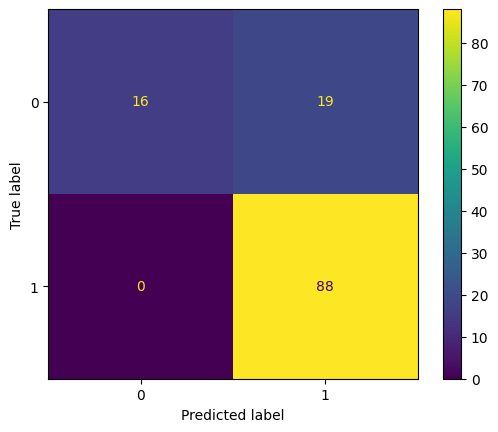

In [47]:
y_pred = model.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()
